In [1]:
from bs4 import BeautifulSoup
import requests
import csv
from time import sleep
from random import randint
from datetime import datetime
import re as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing Libraries

In [2]:
import warnings #Importing warnings 
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
def get_url(position, location):
        template = 'https://www.indeed.com/jobs?q={}&l={}'
        url = template.format(position, location)
        return url

def get_record(card):
    spantag = card.div.h2
    try:
        temp=spantag.text
        if "new" in temp[0:4]:# Extracting job title
            job_title=temp.replace("new","")
        else:
            job_title=temp
      
    except AttributeError:
        job_title = ''
    try:
        company = card.find('span', 'companyName').text.strip()#Extracting company Name.
    except AttributeError:
        company = ''
    try:
        location = card.find('div', 'companyLocation').text# Extracting company Location.
    except AttributeError:
        location = ''
    try:
        job_summary = card.find('div', 'job-snippet').text.strip()#Extracting job summary.
    except AttributeError:
        job_summary = ''
    try:
        post_date = card.find('span', 'date').text.strip()#Extracting job posted date.
    except AttributeError:
        post_date = ''
    try:
        salary = card.find('div', 'attribute_snippet').text.strip()#Extracting salary information.
    except AttributeError:
        salary = ''
    
    extract_date = datetime.today().strftime('%Y-%m-%d')#Current date and time. 

    
    return (job_title, company, location, job_summary, salary, post_date, extract_date)

def main(position, location):
  
    records = []  
    url = get_url(position, location) 
    
    while True:
        print(url)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'job_seen_beacon')

        for card in cards:
            record = get_record(card)
            records.append(record)

        try:
            url = 'https://www.indeed.com' + soup.find('a', {'aria-label': 'Next'}).get('href')
            delay = randint(1, 10)
            sleep(delay)
        except AttributeError:
            break

    with open('Data Science job.csv', 'w', newline='', encoding='utf-8') as f:#Saving the file as csv.
        writer = csv.writer(f)
        writer.writerow(['Job Title', 'Company', 'Location', 'Summary' ,'Salary', 'Posting Date', 'Extract Date'])
        writer.writerows(records)

In [38]:
#main('Data Scientist', 'United States')#This will run the webscraper and create new data as per extracted. 
#For maintaining the same visualizations, we are using already webscraped generated csv file Data Science job.csv for analysis.

In [5]:
data=pd.read_csv("Data Science job.csv")# Reading uncleaned csv file to dataframe
df=data

In [6]:
df = df.dropna(subset=['Job Title'])
df.loc[df['Job Title'].str.contains('Sr'), 'Job Title'] = 'Senior Data Scientist'
df.loc[df['Job Title'].str.contains('Jr'), 'Job Title'] = 'Junior Data Scientist'
df.loc[df['Job Title'].str.contains('JR'), 'Job Title'] = 'Junior Data Scientist'
df.loc[df['Job Title'].str.contains('Remote'), 'Job Title'] = 'Data Scientist'

df[['Job Title', 'redundant']] = df['Job Title'].str.split(',',n=1, expand=True)
df[['Job Title', 'redundant2']] = df['Job Title'].str.split(' -',n=1, expand=True)

In [7]:
v = df["Job Title"].value_counts()
df2=df[df["Job Title"].isin(v.index[v.gt(3)])]

In [8]:
Job_Title_Table=df2["Job Title"].value_counts()

In [9]:
Job_Title_Table

Data Scientist                 493
Senior Data Scientist          120
Junior Data Scientist           20
Data Scientist I                20
Lead Data Scientist             17
Associate Data Scientist        13
Data Scientist II               11
Chief Data Scientist             8
Principal Data Scientist         6
NLP Data Scientist               5
Machine Learning Engineer        5
Staff Data Scientist             5
Senior Data Analyst              5
Data Scientist- Summer 2022      4
Product Data Scientist           4
Name: Job Title, dtype: int64

In [10]:
df.shape

(989, 9)

## Location Column Refining

In [11]:
df2.head()

,Job Title,Company,Location,Summary,Salary,Posting Date,Extract Date,redundant,redundant2
0,Junior Data Scientist,SRI International,"Arlington, VA 22209 (Radnor-Ft Myer Heights ar...",1-2 years working with data scientists to supp...,"$92,192 - $115,240 a year",PostedToday,2021-12-02,None,None
1,Data Scientist,Good Tree,"Montebello, CA 90640•Remote",You will build data products to extract valuab...,$45 an hour,PostedToday,2021-12-02,None,None
2,Junior Data Scientist,Aignyte,Remote,Experience in machine and statistical learning...,"$70,000 - $90,000 a year",EmployerActive 1 day ago,2021-12-02,None,None
4,Senior Data Scientist,Netflix,"Los Gatos, CA+3 locations•Remote","Effectively identify and apply analytics, caus...",NaN,PostedToday,2021-12-02,None,None
5,Data Scientist,Belcan,"West Sacramento, CA+1 location","Responsible for experimental design, novel sta...",Contract,Posted1 day ago,2021-12-02,None,None


In [12]:
df2[['City', 'State']] = df['Location'].str.split(',',n=1, expand=True)
df2.loc[df2['City'].str.contains('Remote'), 'City'] = 'Remote'
df2.loc[df2['City'].str.contains('Virgin Islands'), 'City'] = 'Virgin Islands'

df2['State_Abbrevation'] = df2['State'].astype(str).str[0:3]
df2['State_Abbrevation']=df2['State_Abbrevation'].str.strip()
df2.loc[df2['State_Abbrevation'].str.contains('Non'), 'State_Abbrevation'] = 'Remote'

In [13]:
us_state_to_abbrev = {
    "Remote":"Remote",
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [14]:
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [15]:
df2['State_Abbrevation']=df2['State_Abbrevation'].map(abbrev_to_us_state)
df2.drop(["Location","redundant" ,"redundant2","State"], inplace=True,axis=1)

In [16]:
df2["Posting Date"].value_counts()

Posted30+ days ago            329
PostedToday                    65
Posted2 days ago               32
EmployerActive 2 days ago      31
Posted1 day ago                22
Posted9 days ago               17
Posted16 days ago              17
Posted12 days ago              15
Posted8 days ago               14
Posted15 days ago              13
Posted26 days ago              13
Posted23 days ago              13
Posted19 days ago              12
EmployerActive 3 days ago      12
Posted7 days ago               11
EmployerActive 1 day ago       10
Posted21 days ago              10
Posted14 days ago               9
Posted13 days ago               8
Posted28 days ago               7
Posted27 days ago               7
Posted3 days ago                6
Posted20 days ago               5
Posted29 days ago               5
EmployerActive 15 days ago      5
Posted11 days ago               4
Posted25 days ago               4
EmployerActive 10 days ago      3
EmployerActive 13 days ago      3
EmployerActive

In [17]:
df2.loc[df2['Posting Date'].str.contains('Posted'), 'Posting Date'] = df2["Posting Date"].astype(str).str[6:]
df2.loc[df2['Posting Date'].str.contains('EmployerActive'), 'Posting Date'] = df2["Posting Date"].astype(str).str[15:]
df2['Posting Date']=df2["Posting Date"].str.strip()

In [18]:
df2["Posting Date"].value_counts()

30+ days ago    329
Today            65
2 days ago       63
1 day ago        32
12 days ago      18
16 days ago      18
3 days ago       18
15 days ago      18
9 days ago       17
8 days ago       17
23 days ago      14
26 days ago      13
19 days ago      12
7 days ago       11
13 days ago      11
21 days ago      11
14 days ago      10
27 days ago       7
20 days ago       7
28 days ago       7
10 days ago       6
29 days ago       5
25 days ago       4
11 days ago       4
22 days ago       3
30 days ago       3
5 days ago        3
17 days ago       3
24 days ago       2
18 days ago       2
Just posted       2
6 days ago        1
Name: Posting Date, dtype: int64

In [19]:
df2.loc[df2['Posting Date'].str.contains('Just posted'), 'Posting Date'] = 'Today'

In [20]:
df2["Salary"].value_counts().index

Index(['Full-time', 'Contract', '$90,000 - $120,000 a year', '$35.28 an hour',
       'Up to $70 an hour', '$50 - $60 an hour', 'From $130,000 a year',
       '$100,000 - $120,000 a year', '$44 an hour',
       '$110,000 - $130,000 a year', '$80,000 - $120,000 a year',
       '$130,000 - $165,000 a year', '$142,400 a year',
       '$106,500 - $130,200 a year', '$125,000 a year',
       '$100,000 - $150,000 a year', '$80,000 - $100,000 a year',
       '$400 - $500 a day', '$22.99 - $25.86 an hour',
       '$99,112 - $130,083 a year', '$85,000 - $95,000 a year',
       'From $100,000 a year', '$74,150 - $185,060 a year',
       '$60,000 - $80,000 a year', '$65,000 - $187,450 a year',
       '$50,000 - $75,000 a year', '$25 an hour', '$87,000 - $121,000 a year',
       '$140,000 - $170,000 a year', '$155,000 - $195,000 a year',
       '$50,000 - $80,000 a year', 'Up to $195,500 a year',
       '$7,545 - $12,509 a month', 'Internship', '$100,000 - $218,163 a year',
       '$150,000 - $175,

## Changing hour to yearly salary in salary column

In [21]:
df3=df2
df3['Salary']=df3['Salary'].map(str)
df3["Salary"].fillna("Data Not Available", inplace = True)

hour=df3[df3['Salary'].str.contains('hour')]
year=df3[df3['Salary'].str.contains('year')]
month=df3[df3['Salary'].str.contains('month')]

hour.loc[hour['Salary'].str.contains('hour'), 'Salary'] = hour["Salary"].str.replace(" an hour", "")
hour.loc[hour['Salary'].str.contains('Up to '), 'Salary'] = hour["Salary"].str.replace("Up to ", "")
hour.loc[hour['Salary'].str.contains('From'), 'Salary'] = hour["Salary"].str.replace("From ", "")
hour.loc[hour['Salary'].str.contains('$'), 'Salary'] = hour["Salary"].str.replace("$", "")

hour[['Salary', 'Ending Salary']] = hour['Salary'].str.split('-',n=1, expand=True)
hour['Salary']=hour['Salary'].map(float)
hour["Salary"] =  hour["Salary"]*2080

hour.drop("Ending Salary", inplace=True,axis=1)


year.loc[year['Salary'].str.contains('year'), 'Salary'] = year["Salary"].str.replace(" a year", "")
year.loc[year['Salary'].str.contains('Up to '), 'Salary'] = year["Salary"].str.replace("Up to ", "")
year.loc[year['Salary'].str.contains('From'), 'Salary'] = year["Salary"].str.replace("From ", "")
year.loc[year['Salary'].str.contains('$'), 'Salary'] = year["Salary"].str.replace("$", "")

year[['Salary', 'Ending Salary']] = year['Salary'].str.split(' - ',n=1, expand=True)
year.loc[year['Salary'].str.contains(','), 'Salary'] = year["Salary"].str.replace(",", "")

year['Salary']=year['Salary'].map(float)
year.drop("Ending Salary", inplace=True,axis=1)

month.loc[month['Salary'].str.contains('month'), 'Salary'] = month["Salary"].str.replace(" a month", "")
month.loc[month['Salary'].str.contains('$'), 'Salary'] = month["Salary"].str.replace("$", "")

month[['Salary', 'Ending Salary']] = month['Salary'].str.split(' - ',n=1, expand=True)
month.loc[month['Salary'].str.contains(','), 'Salary'] = month["Salary"].str.replace(",", "")
month['Salary']=month['Salary'].map(float)

month["Salary"] =  month["Salary"]*12
month.drop("Ending Salary", inplace=True,axis=1)

## Appending hour, year and month dataframes to final dataframe

In [22]:
final_df=year.append(month, ignore_index = True)
final_df=final_df.append(hour, ignore_index = True)

bins = [0, 50000, 60000, 70000, 80000, 90000, 100000,110000,120000,130000,140000,150000,160000,170000,180000,190000]
final_df['Salary'] = pd.cut(final_df['Salary'], bins)

DataNot=df3[df3['Salary'].str.contains('nan')]
Fulltime=df3[df3['Salary'].str.contains('Full-time')]

final_df=final_df.append(DataNot, ignore_index = True)
final_df=final_df.append(Fulltime, ignore_index = True)

final_df["Salary"].fillna("Data Not Available", inplace = True)
final_df.to_csv('Final_data.csv', index=False)

# Normalization of Refined Data Science csv

In [23]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
from datetime import date, timedelta
from random import randrange

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

def get_random_date():
    
    start_date = date(2020, 1, 1)
    end_date = date(2021, 12, 1)
    
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = randrange(days_between_dates)
    random_date = start_date + timedelta(days=random_number_of_days)
    return random_date

In [24]:
city_and_state = set()
companies = set()
job_titles = set()
rows = []
with open('Final_data.csv', 'r', encoding='utf-8') as f:
    # Skipping the header line
    f.readline()
    lines = f.readlines()
    for line in lines:
        splits = line.split('"')
        if len(splits) == 3:   
            try:
                job_title = splits[0].split(",")[0].strip()
                company = splits[0].split(",")[1].strip()
                lower_sal = int(splits[1].split(',')[0][1:])
                higher_sal = int(splits[1].split(',')[0][1:])
                city = splits[2].split(',')[3]
                state = splits[2].split(',')[4].strip()
            except Exception as e:
                # Case when the second column is not a number
                job_title = splits[0].split(",")[0].strip()
                company = splits[1].strip()
                lower_sal = 80000
                higher_sal = 100000
                city = splits[2].split(',')[-2].strip()
                state = splits[2].split(',')[-1].strip()
        elif len(splits) == 5:
            job_title = splits[0].split(",")[0].strip()
            company = splits[1].strip()
            lower_sal = int(splits[3].split(',')[0][1:])
            higher_sal = int(splits[3].split(',')[0][1:])
            city = splits[4].split(',')[3]
            state = splits[4].split(',')[4].strip()
        elif len(splits) == 1:
            job_title = splits[0].split(",")[0].strip()
            company = splits[0].split(',')[1].strip()
            lower_sal, higher_sal = 80000, 100000
            city = splits[0].split(',')[5].strip()
            state = splits[0].split(',')[6].strip()
            

        job_titles.add(job_title)
        companies.add(company)
        city_and_state.add((city, state))
        rows.append((job_title, company, lower_sal, higher_sal, get_random_date(), city, state))

conn = create_connection('_normalized-final.db', True)

with conn:
    cursor = conn.cursor()
    
    # Creating Company table
    sql_statement = "CREATE TABLE COMPANY(id integer primary key autoincrement default 1, company text not null);"
    create_table(conn, sql_statement)
    for i in companies:
        sql_statement = f"INSERT INTO COMPANY(company) values(\"{i}\");"
        execute_sql_statement(sql_statement, conn)
    
    # Creating Geography table
    sql_statement = "CREATE TABLE GEO(id integer primary key autoincrement default 1, city text not null, state text not null);"
    create_table(conn, sql_statement)
    cursor.executemany("INSERT INTO GEO(city, state) values(?, ?)", list(city_and_state))
    
    # Creating Jobtitles table
    sql_statement = "CREATE TABLE JOBTITLES(id integer primary key autoincrement default 1, title text not null);"
    create_table(conn, sql_statement)
    for i in job_titles:
        sql_statement = f"INSERT INTO JOBTITLES(title) values(\"{i}\");"
        execute_sql_statement(sql_statement, conn)
        
    # Creating Job table
    sql_statement = "CREATE TABLE JOB(id integer primary key autoincrement default 1, title integer not null, company integer not null, low_sal integer not null, high_sal integer not null, posting_date text not null, geo integer not null, foreign key(title) references jobtitles(id), foreign key(company) references COMPANY(id), foreign key(geo) references GEO(id));"
    create_table(conn, sql_statement)
    for i in rows:
        sql_statement = f"SELECT ID FROM JOBTITLES where title = '{i[0]}';"
        title_id = execute_sql_statement(sql_statement, conn)[0][0]
        sql_statement = f"SELECT ID FROM COMPANY where company = \"{i[1]}\";"
        company_id = execute_sql_statement(sql_statement, conn)[0][0]
        sql_statement = f"SELECT ID FROM GEO where city = \"{i[5]}\";"
        geo_id = execute_sql_statement(sql_statement, conn)[0][0]
        sql_statement = f"INSERT INTO JOB(title, company, low_sal, high_sal, posting_date, geo) values({title_id}, {company_id}, {i[2]}, {i[3]}, {str(i[4])}, {geo_id});"
        execute_sql_statement(sql_statement, conn)
    
    # Getting the final table using JOINS
    sql_statement = "CREATE TABLE JOBMAIN AS SELECT JOBTITLES.title, COMPANY.company, JOB.low_sal, JOB.high_sal, GEO.city, GEO.state from JOB INNER JOIN JOBTITLES on JOB.title = JOBTITLES.id INNER JOIN COMPANY on JOB.company = COMPANY.id INNER JOIN GEO on JOB.geo = GEO.id;"
    create_table(conn, sql_statement)
    data = pd.read_sql_query('SELECT * FROM JOBMAIN', conn)
    display(data)


,title,company,low_sal,high_sal,city,state
0,Junior Data Scientist,SRI International,90000,90000,Arlington,Virginia
1,Junior Data Scientist,Aignyte,60000,60000,Remote,Remote
2,Data Scientist,Ovintiv,70000,70000,The Woodlands,Texas
3,Data Scientist,Inclusive Links,80000,80000,Remote,Remote
4,Data Scientist,"Growers Edge Financial, Inc.",70000,70000,Johnston,Iowa
...,...,...,...,...,...,...
721,Senior Data Scientist,Q-State Biosciences Inc,80000,100000,Cambridge,Massachusetts
722,Data Scientist,VertexOne,80000,100000,Remote,Remote
723,Lead Data Scientist,C2FO Limited,80000,100000,Grandview,Missouri
724,Senior Data Scientist,ManTech International Corporation,80000,100000,Ashburn,Virginia


Text(0.5, 1.0, 'Top 5 Data Science job titles')

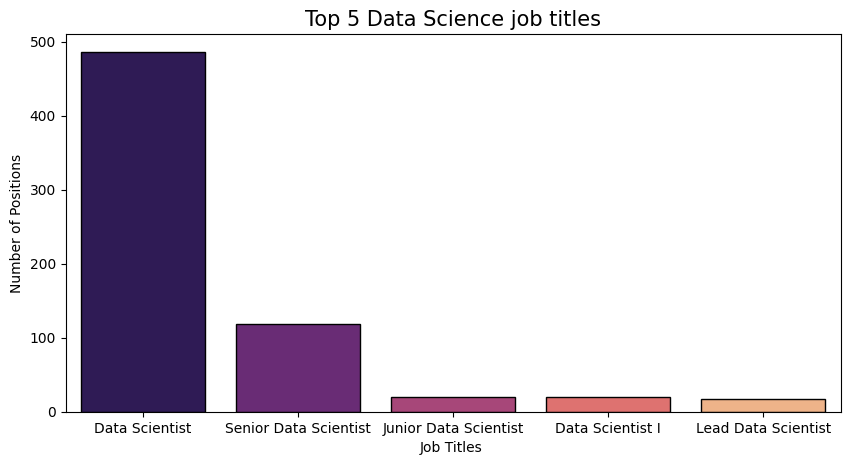

In [25]:
## Creating a  Bar Plot  ##
top_5_Job_titles=data["title"].value_counts()
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(y=top_5_Job_titles.values[0:5],x=top_5_Job_titles.index[0:5], palette = "magma",edgecolor='black')
plt.ylabel("Number of Positions", fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=0)
plt.xlabel("Job Titles ", fontsize=10)
plt.title("Top 5 Data Science job titles",fontsize=15)

# Data Visualization 

Text(0.5, 1.0, ' Highest Salary percentage for Data Scientists')

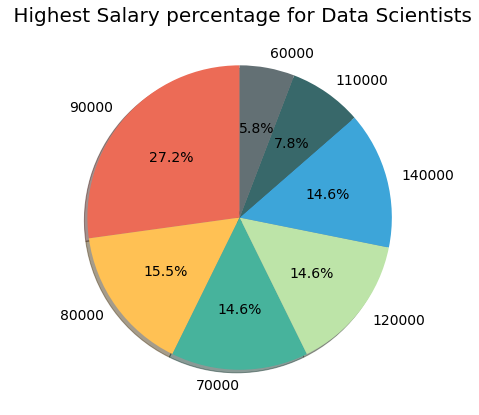

In [26]:
data1=data[data["high_sal"]!=0]
DS_positions=data1["high_sal"].value_counts()
labels= DS_positions.index[1:8]  # x ticks
sizes= DS_positions.values[1:8]
## Create Pie chart Plot ##
plt.figure(figsize = (7,7))
explode = [0,0,0,0,0,0,0]
colors = ['#EC6B56','#FFC154','#47B39C','#BDE4A8','#3DA5D9','#38686A','#637074']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 14}, startangle=90, colors=colors)
plt.title(' Highest Salary percentage for Data Scientists',color = 'Black',fontsize = 20)

Text(0.5, 1.0, 'Top 5 Working locations for Data Science positions.')

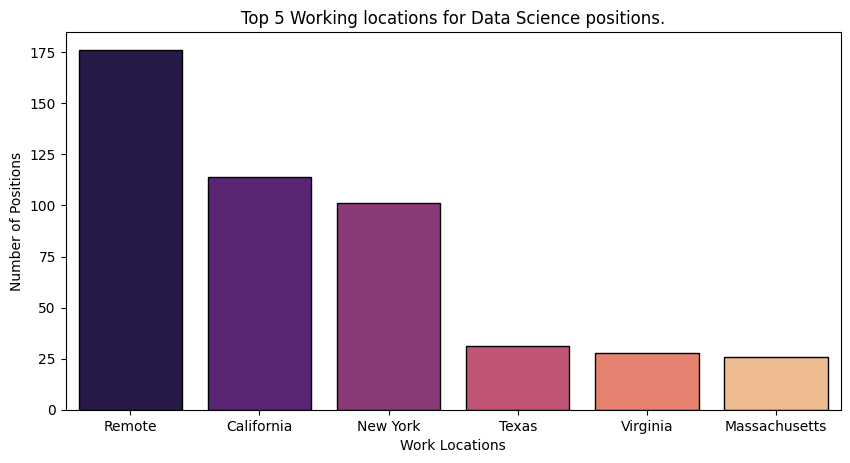

In [27]:
## Creating a  Bar Plot  ##
top_5_working=data["state"].value_counts()
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(y=top_5_working.values[0:6],x=top_5_working.index[0:6], palette = "magma",edgecolor='black')
plt.ylabel("Number of Positions", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Work Locations", fontsize=10)
plt.title('Top 5 Working locations for Data Science positions.')

[Text(0.5, 0, 'Lowest salary'),
 Text(0, 0.5, 'Number of positions'),
 Text(0.5, 1.0, ' Comparison of Salary ranges between California and New York States')]

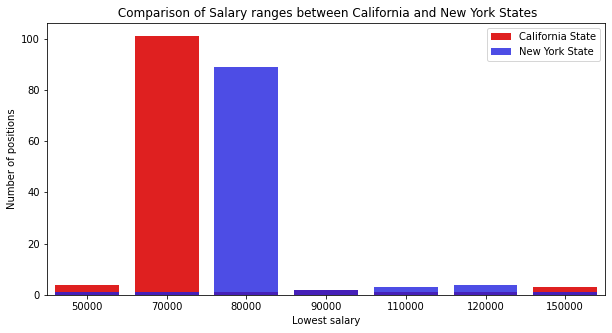

In [36]:
california_df=data[data["state"]=="California"]
ny_df=data[data["state"]=="New York"]
Cali_top_5_salary=california_df["low_sal"].value_counts()
NY_top_5_salary=ny_df["low_sal"].value_counts()

f,ax = plt.subplots(figsize = (10,5))
sns.barplot(y=Cali_top_5_salary.values[0:8],x=Cali_top_5_salary.index[0:8],color='red',alpha = 1,label='California State' )
sns.barplot(y=NY_top_5_salary.values[0:8],x=NY_top_5_salary.index[0:8],color='blue',alpha = 0.8,label='New York State')

ax.legend(loc='upper right',frameon = True)  
ax.set(xlabel='Lowest salary', ylabel='Number of positions',title =  " Comparison of Salary ranges between California and New York States")

Text(0.5, 1.0, 'Top 5 Companies looking for Data Science positions.')

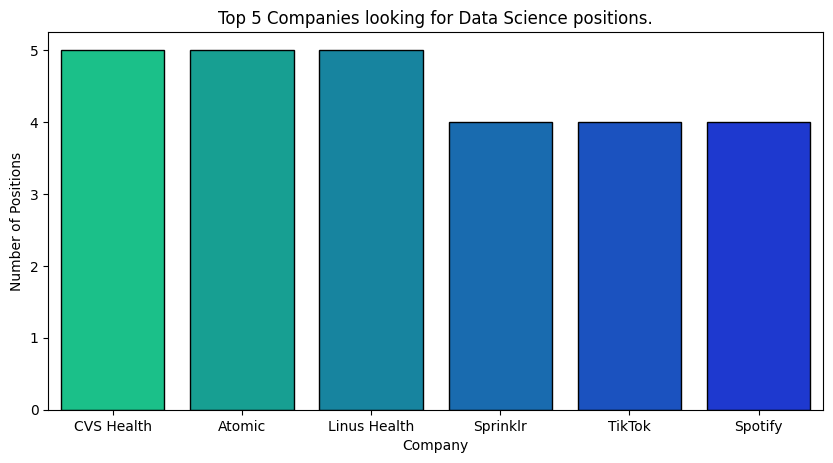

In [29]:
## Creating a  Bar Plot  ##
top_5_companies=data["company"].value_counts()
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(y=top_5_companies.values[0:6],x=top_5_companies.index[0:6], palette = "winter_r",edgecolor='black')
plt.ylabel("Number of Positions", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Company", fontsize=10)
plt.title('Top 5 Companies looking for Data Science positions.')

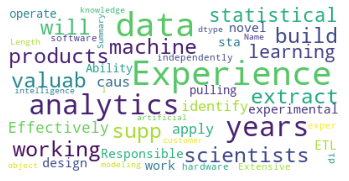

In [37]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['Summary']))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()